# Structure démique

Il y a de gros problèmes liés à la résolution spatiale utilisée. Ici j'ai utilisé des données worldclim pour représenter la structure démique (les dèmes sont assimilés aux coordonnées des centroides des cellules de la grille. La résolution initiale a été dégradée (dèmes plus gros), les valeurs de bio1 ne sont pas utilisées dans ce modèle.

class       : RasterLayer 
dimensions  : 60, 96, 5760  (nrow, ncol, ncell)
resolution  : 0.4166667, 0.4166667  (x, y)
extent      : -20, 20, 35, 60  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/user/Soutenance/preliminaries/wc2.0_10m_prec_01_europe_agg_fact_5.tif 
names       : wc2.0_10m_prec_01_europe_agg_fact_5 
values      : -1.562582, 19.61809  (min, max)



FALSE  TRUE 
 2813  2947 

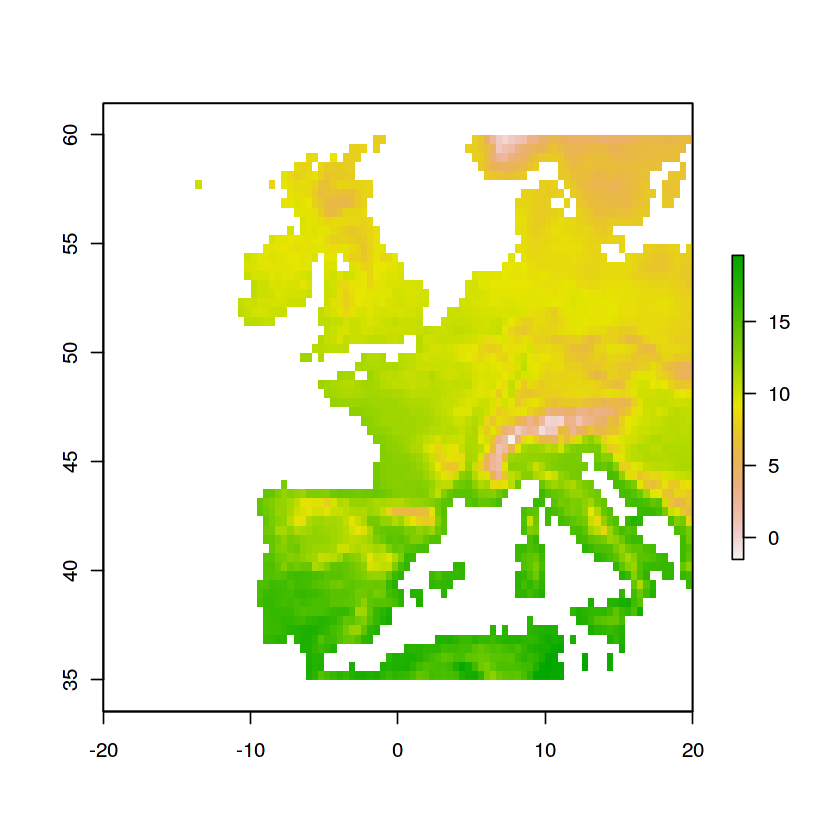

In [21]:
library("raster")
library("rgdal")
bio1 <- raster("wc2.0_10m_prec_01_europe_agg_fact_5.tif")
bio1
table(is.na(getValues(bio1)))
plot(bio1)


# Modèle

## Loi de croissance logistique
* $r \sim U[1,20]$
* $k \sim U[1,500]$

## Modèle de dispersion gaussienne (voir Nathan et al.)
* $a \sim U[10,1000]$

## Nombre de gamètes introduits initialement:
* $N_0 \sim U[1,15]$



# Prior predictive sampling

On regarde à la sortie du simulateur si les distributions a priori ont été très modifiées par le rejet des simulations pour lesquelles la démographie a collapsé ou bien n'a pas atteint les points d'échantillonnage:

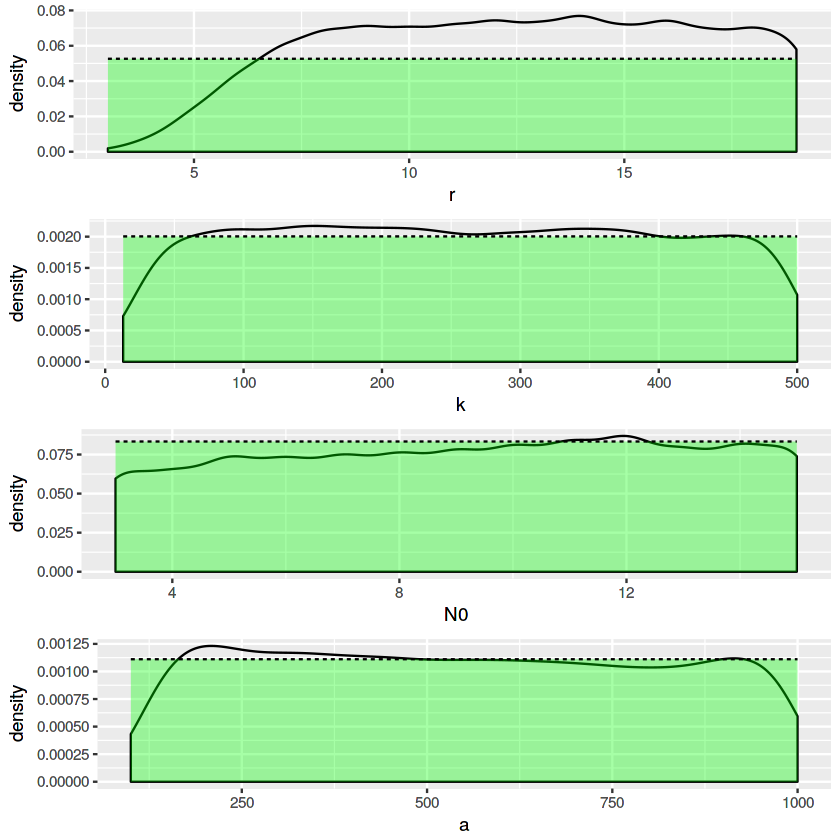

In [5]:
library(ggplot2)
library(plyr)

file <- "results_10_000_fast.txt"
df <- read.csv(file, sep="\t")

# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)
  
  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
  
  numPlots = length(plots)
  
  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                     ncol = cols, nrow = ceiling(numPlots/cols))
  }
  
  if (numPlots==1) {
    print(plots[[1]])
    
  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
    
    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
      
      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}


# Prior predictive sampling distribution
p1 <- ggplot(df, aes(x=r))  + 
  geom_density(kernel="gaussian") +
  stat_function(fun=dunif, args = list(1,20), geom = "area", fill= "green", alpha = 0.35) +
  stat_function(fun=dunif, args = list(1,20), lty = 2)

p2 <- ggplot(df, aes(x=k)) +
  geom_density(kernel="gaussian") +
  stat_function(fun=dunif, args = list(1,500), geom = "area", fill= "green", alpha = 0.35) +
  stat_function(fun=dunif, args = list(1,500), lty = 2)

p3 <- ggplot(df, aes(x=N0)) + 
  geom_density(kernel="gaussian") +
  stat_function(fun=dunif, args = list(3,15), geom = "area", fill= "green", alpha = 0.35) +
  stat_function(fun=dunif, args = list(3,15), lty = 2)


p4 <- ggplot(df, aes(x=a)) +
  geom_density(kernel="gaussian") +
  stat_function(fun=dunif, args = list(100,1000), geom = "area", fill= "green", alpha = 0.35) +
  stat_function(fun=dunif, args = list(100,1000), lty = 2)

multiplot(p1,p2,p3,p4)

# Distribution des FTD à l'observé pour chaque locus.

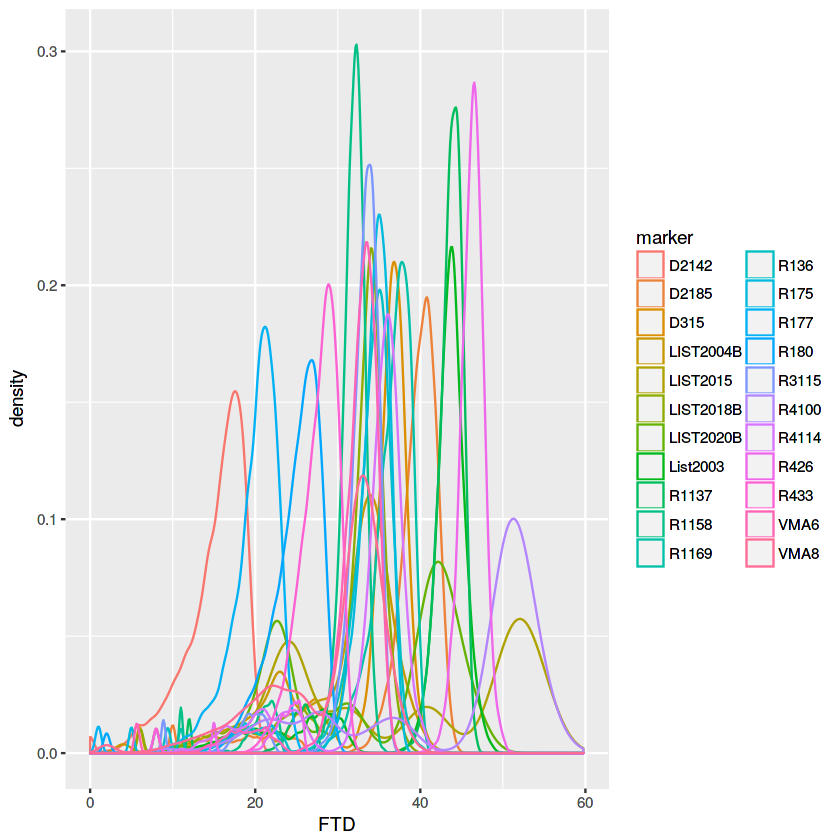

In [7]:
loci_names <- names(df)[-c(1,2,3,4)]
ftds <- df[,loci_names]
stacked_ftds <- stack(ftds)
names(stacked_ftds) <- c("FTD", "marker")
ggplot(stacked_ftds, aes(x=FTD)) + geom_density(aes(group=marker, colour=marker))

Vous en pensez quoi ?

# Rejection and posteriors estimation

r k N0 a D2142 D2185 D315 LIST2004B LIST2015 LIST2018B ⋯ R175 R177 R180 R3115 R4100 R4114 R426 R433 VMA6 VMA8 
 
 687 18 386 3 347.9657 6.500000 19.91667 19.21667 20.58333 21.08333 24.95000 ⋯ 21.00000 14.583333 16.30000 8.880952 22.50000 14.21667 22.80000 23.71429 31.416667 12.00000 
 727 7 458 3 312.2748 9.000000 10.00000 13.30000 12.66667 23.50000 14.03333 ⋯ 23.00000 18.416667 20.36667 8.880952 22.00000 15.45000 23.36667 24.38095 18.666667 19.50000 
 739 17 255 3 150.5941 5.166667 10.00000 29.41667 22.16667 19.33333 25.40000 ⋯ 5.00000 8.416667 20.80000 20.726190 16.50000 20.06667 24.86667 8.00000 21.666667 14.55556 
 904 17 307 3 313.1372 6.208333 24.33333 6.00000 17.50000 22.83333 13.20000 ⋯ 32.66667 9.250000 22.24167 8.880952 28.83333 23.28333 22.30000 23.71429 21.166667 2.00000 
 945 9 471 3 189.0122 6.625000 10.00000 16.46667 13.25000 18.33333 21.50000 ⋯ 22.08333 16.583333 21.96667 19.202381 22.83333 19.38333 25.70000 24.71429 12.000000 18.11111 
 1219 19 263 3 542.5011 0.000000 18.66667 20.36667 16.33333 18.00000 15.70000 ⋯ 17.41667 13.166667 18.53333 30.976190 20.08333 26.61667 21.80000 26.67262 5.666667 12.58333

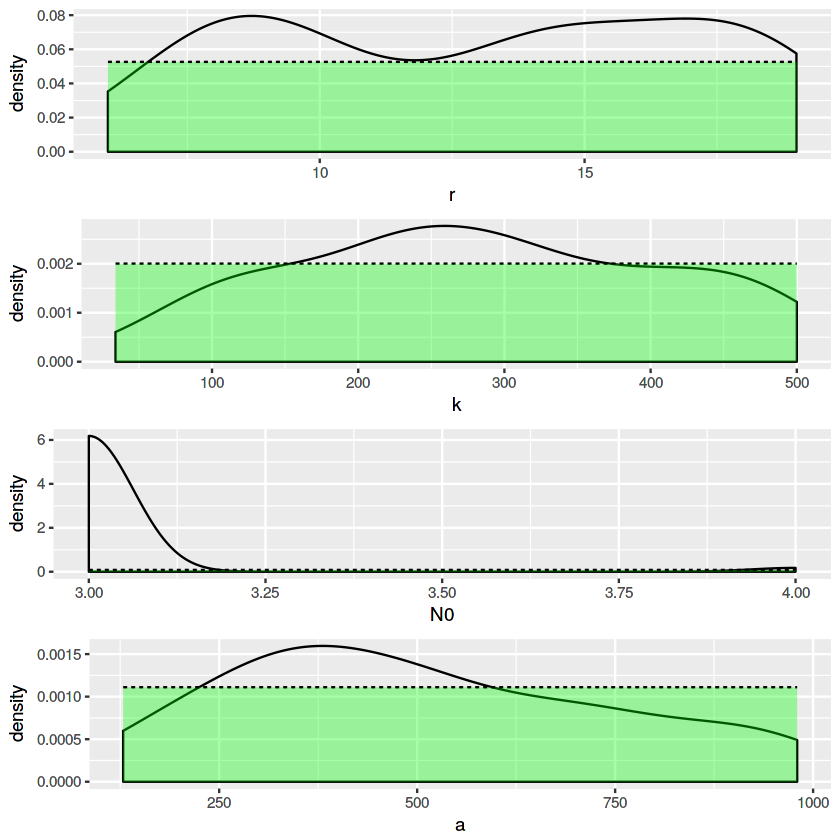

In [8]:
# Rejection
quantiles <- lapply(ftds, quantile, 0.3)
library (plyr)
qt <- ldply (quantiles, data.frame)
sample <- df[apply(df [loci_names], 1, function(x) all(x < qt[,2])),]
head(sample)

p5 <- ggplot(sample, aes(x=r))  + 
  geom_density(kernel="gaussian") +
  stat_function(fun=dunif, args = list(1,20), geom = "area", fill= "green", alpha = 0.35) +
  stat_function(fun=dunif, args = list(1,20), lty = 2)

p6 <- ggplot(sample, aes(x=k)) +
  geom_density(kernel="gaussian") +
  stat_function(fun=dunif, args = list(1,500), geom = "area", fill= "green", alpha = 0.35) +
  stat_function(fun=dunif, args = list(1,500), lty = 2)

p7<- ggplot(sample, aes(x=N0)) + 
  geom_density(kernel="gaussian") +
  stat_function(fun=dunif, args = list(3,15), geom = "area", fill= "green", alpha = 0.35) +
  stat_function(fun=dunif, args = list(3,15), lty = 2)


p8 <- ggplot(sample, aes(x=a)) +
  geom_density(kernel="gaussian") +
  stat_function(fun=dunif, args = list(100,1000), geom = "area", fill= "green", alpha = 0.35) +
  stat_function(fun=dunif, args = list(100,1000), lty = 2)

multiplot(p5,p6,p7,p8)


Je trouve que l'estimation de N0 est bizarre. Je m'attendais pas à ça, pour la seul et bonne raison que la diversité allélique aux loci n'est pas de 3 :/ je vais voir si il y a un problème de prog, et je vous dis ça. J'espère que c'est un problème de nombre de simulation.